This is the proposed novel algorithm for social network analysis community detection.


Required Libraries - networkx, pandas, matplotlib, time

pip install networkx

pip install pandas

pip install matplotlib

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_4452/97141243.py:51: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv('twitter_data.csv')


Final Number of Communities: 33214
Final Modularity: 0.9991585139305224
Execution Time: 65.10944509506226 seconds
Final Detected Communities:
Community 1: {'tw-691470612154486785', 'tw-708225975176273920', 'tw-714029244410675200', 'tw-693509001385000962', 'tw-712881655359344640', 'tw-715841238742777856', 'tw-699010253057302528', 'tw-695773951188926465', 'tw-695341120889364481', 'tw-696956756665180160', 'tw-694606261413908480', 'tw-700072292806750208', 'tw-685908985082437634', 'tw-687333301397405696', 'tw-711794495487090688', 'tw-715398269828878336', 'tw-710687211176513536', 'tw-682912342166867969', 'tw-683845324813811713', 'tw-692069535390814209', 'tw-698310697118208000', 'tw-692920154313854977', 'tw-708175646824857601', 'tw-696176605656391683', 'tw-694508866181140484', 'tw-711890129418326016', 'tw-695874656914505728', 'tw-691369929770164224', 'tw-714416766429081600', 'tw-687771204795666432', 'tw-699448138571128834', 'tw-687031385715044352', 'tw-686658883528568832', 'tw-710526169746173

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


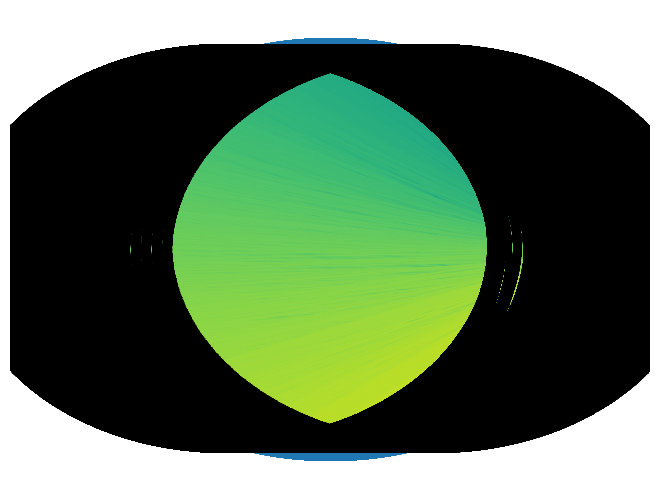

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import time

"""Novel Modularity Optimization Algorithm for Community Detection (Twitter Dataset)
"""
# Create Graph 
NetworkGraph = nx.Graph()

def novel_modularity_optimization_twitter(twitter_data, max_iterations=1):

    
    # Add the node and edges to the graph (Users and Tweets relationship)
    NetworkGraph.add_edges_from(twitter_data[['user_id', 'tweet_id']].itertuples(index=False))

    # Initial communities are obtained using connected components 
    network_communities = list(nx.connected_components(NetworkGraph))

    # Calculate the modularity of the initial communities
    nework_modularity = nx.community.modularity(NetworkGraph, network_communities)

    # Start an iterative loop for a specified number of iterations
    for iterator in range(max_iterations):

        #print(f"Iteration No is: {iterator + 1}:")

        # Iterate over each node in the graph. 
        for node in NetworkGraph.nodes:
            current_community = next(com for com in network_communities if node in com)
            neighbors = set(NetworkGraph.neighbors(node))
            # Iterate over each neighbor of the node
            for neighbor in neighbors:
                novel_community = next(com for com in network_communities if neighbor in com)
                # Check if moving the node to a neighbor's community would increase modularity
                if current_community != novel_community:
                    novel_communities = [set(current_community - {node}), set(novel_community | {node})]
                    new_modularity = nx.community.modularity(NetworkGraph, novel_communities)
                    # If modularity increases, update the communities and recalculate modularity
                    if new_modularity > nework_modularity:
                        network_communities.remove(current_community)
                        network_communities += novel_communities
                        nework_modularity = new_modularity

        print("Final Number of Communities:", len(network_communities))
        print("Final Modularity:", nework_modularity)

    return list(network_communities)

exec_start_time = time.time()
twitter_data = pd.read_csv('twitter_data.csv')
# Call the algorithm with the Twitter dataset
twitter_communities = novel_modularity_optimization_twitter(twitter_data)
exec_end_time = time.time()

# Calculate and print the execution time of the algorithm (time complexity) 
execution_time = exec_end_time - exec_start_time
print(f"Execution Time: {execution_time} seconds")

# Print the final detected communities
print("Final Detected Communities:")
for i, twitter_community in enumerate(twitter_communities):
    print(f"Community {i + 1}: {twitter_community}")

# Plot the detected communities
pos = nx.circular_layout(NetworkGraph)
colors = range(len(NetworkGraph.edges))
nx.draw(NetworkGraph, pos, edge_color=colors, with_labels=True, cmap=plt.cm.Blues)
plt.show()